<a href="https://colab.research.google.com/github/OKleg/CV_labs/blob/main/CV_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%pip install opencv-python
#%pip install numpy
#%pip install matplotlib

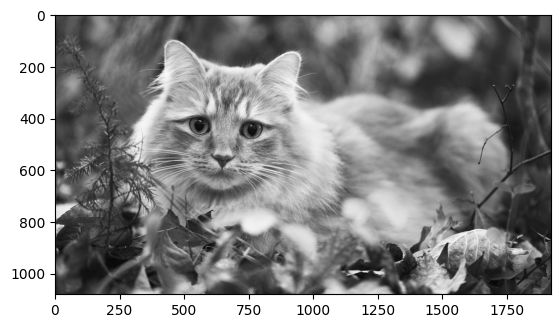

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
def loading(path):
    return cv2.imread(path,cv2.IMREAD_COLOR)

 #1) Gray=0.3*R+0.59*G+0.11*B;
def change_pict_1(path):

    img = loading(path)
    gray = 0.3*img[:,:, 2]+0.59*img[:, :, 1]+0.11*img[:, :, 0]
    gray = (np.repeat(gray[:, :, None], 3, axis=2).astype(np.uint8))
    return gray

plt.imshow(change_pict_1('pict.jpg'),'gray')


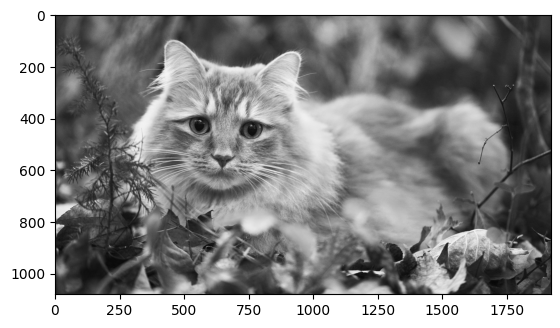

In [ ]:
#2) Gray=(R + G + B)/3,
def change_pict_2(path):
    img = loading(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gimg =(img[:, :, 0]/3 + img[:, :, 1]/3 + img[:, :, 2]/3).astype(np.uint8)
    gimg = (np.repeat(gimg[:, :, None], 3, axis=2).astype(np.uint8))
    return gimg
plt.imshow(change_pict_2('pict.jpg'),'gray')

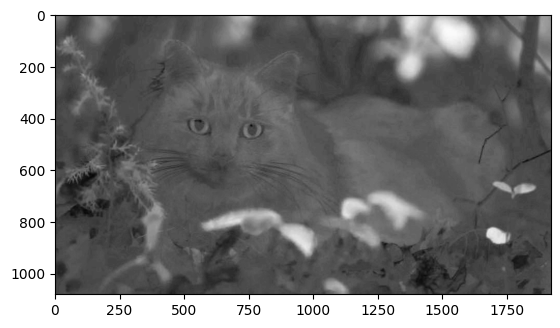

In [ ]:
##Получить разность этих полутоновых изображений
def diff(img1, img2):
    x = img1.astype(np.int16) - img2.astype(np.int16)
    x = (255 * ((x-x.min())/(x.max()-x.min()+1e-7))).astype(np.uint8)
    return x

img1 = change_pict_1('pict.jpg')
img2 = change_pict_2('pict.jpg')

plt.imshow(diff(img1, img2))

In [ ]:
cap = cv2.VideoCapture("video.mp4")
_, last_frame= cap.read()
#videowriter
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('out.mp4', fourcc, cap.get(cv2.CAP_PROP_FPS), (last_frame.shape[0], last_frame.shape[1]))
while True:
    ret, frame= cap.read()
    if not ret:
        break
    out.write(diff(frame, last_frame))
    last_frame = frame
cap.release()
out.release()